<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment11_8282.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
# from google.colab import files

# uploaded = files.upload()

# import zipfile
# import io
# zf = zipfile.ZipFile(io.BytesIO(uploaded['movie_review.zip']), "r")
# zf.extractall()

review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=40000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
print(vectorizer)
X = vectorizer.fit_transform(documents).toarray()
print(X)

# list_x=X.tolist()
# negative=[]
# positive=[]
# for i in range(0,2002):
#   if y[i]==0:
#     negative.append(list_x[i])
#   else:
#     positive.append(list_x[i])
# negative=np.array(negative)
# positive=np.array(positive)
# total_sum=X.sum(axis=0)
# neg_sum=negative.sum(axis=0)
# pos_sum=positive.sum(axis=0)

# neg_ratio=neg_sum/total_sum
# pos_ratio=pos_sum/total_sum

# good=[]
# for i in range(0,len(pos_sum)):
#   if neg_ratio[i]>pos_ratio[i]*3:
#     good.append(i)
#   elif pos_ratio[i]>neg_ratio[i]*3:
#     good.append(i)
# print("good의 길이:   " , len(good))
# new=np.ones((1,2002), dtype=float)
# for i in range(0,len(good)):
#   temp=X[:,good[i]]
#   temp=temp[np.newaxis]
#   new=np.vstack((new,temp))
# new=np.transpose(new)
# new=new[:,1:]

X_train_tmp, X_test_tmp, train_labels, test_labels = train_test_split(X, y, test_size=0.3, shuffle=False)

# print(X_train.shape)

X_pos_sum = np.zeros(12638)
X_neg_sum = np.zeros(12638)

train_data = np.zeros((1401, 897))
test_data = np.zeros((601, 897))

for i in range(0, 2002):
  if y[i] == 0:
    X_neg_sum = X_neg_sum + X[i]
  else:
    X_pos_sum = X_pos_sum + X[i]

pos_neg_voca = 0

for i in range(0, 12638):
  # if abs(X_neg_sum[i] - X_pos_sum[i]) >= 30:
  if (X_neg_sum[i]*4 <= X_pos_sum[i] and X_pos_sum[i] > 8) or (X_pos_sum[i]*4 <= X_neg_sum[i] and X_neg_sum[i] > 8):
    for j in range(0, 1401):
      train_data[j][pos_neg_voca] = X_train_tmp[j][i]
    for j in range(0, 601):
      test_data[j][pos_neg_voca] = X_test_tmp[j][i]
    pos_neg_voca  = pos_neg_voca + 1

# tfidfconverter = TfidfTransformer()
# X_train = tfidfconverter.fit_transform(X_train).toarray()
# X_test = tfidfconverter.fit_transform(X_test).toarray()

# train_data, test_data, train_labels, test_labels = train_test_split(new, y, test_size=0.3, shuffle=False)

print(pos_neg_voca)

# print(train_data[0])
# print(train_data.shape)
# print(type(train_data))
# print(train_data.dtype)

train_data = train_data.astype('uint8')
test_data = test_data.astype('uint8')
print(train_data[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.7, max_features=40000, min_df=5,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\

In [60]:
max([max(sequence) for sequence in train_data])

37

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=pos_neg_voca):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [62]:
x_train[10]

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [63]:
train_labels[10]

1

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [65]:
y_train[10]

1.0

In [66]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(pos_neg_voca,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                14368     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 14,657
Trainable params: 14,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:pos_neg_voca]
partial_x_train = x_train[pos_neg_voca:]

y_val = y_train[:pos_neg_voca]
partial_y_train = y_train[pos_neg_voca:]

In [71]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2000,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 504 samples, validate on 897 samples
Epoch 1/2000
504/504 [==============================] - 0s 195us/step - loss: 0.6937 - binary_accuracy: 0.5000 - val_loss: 0.6940 - val_binary_accuracy: 0.4950
Epoch 2/2000
504/504 [==============================] - 0s 25us/step - loss: 0.6936 - binary_accuracy: 0.5000 - val_loss: 0.6940 - val_binary_accuracy: 0.4950
Epoch 3/2000
504/504 [==============================] - 0s 29us/step - loss: 0.6936 - binary_accuracy: 0.5000 - val_loss: 0.6939 - val_binary_accuracy: 0.4950
Epoch 4/2000
504/504 [==============================] - 0s 34us/step - loss: 0.6935 - binary_accuracy: 0.5000 - val_loss: 0.6939 - val_binary_accuracy: 0.4950
Epoch 5/2000
504/504 [==============================] - 0s 32us/step - loss: 0.6935 - binary_accuracy: 0.5000 - val_loss: 0.6939 - val_binary_accuracy: 0.4950
Epoch 6/2000
504/504 [==============================] - 0s 30us/step - loss: 0.6934 - binary_accuracy: 0.5000 - val_loss: 0.6939 - val_binary_accuracy: 0.4950

In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

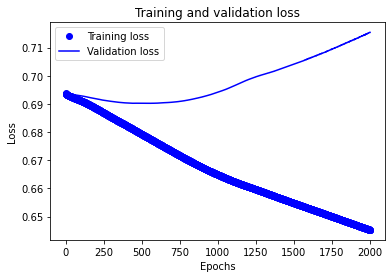

In [73]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

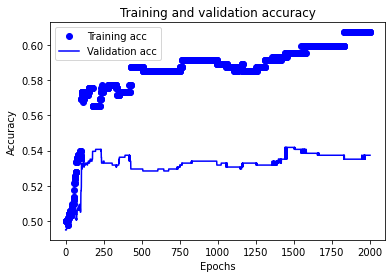

In [74]:
plt.clf()   # clear figure
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [75]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(pos_neg_voca,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, 
          epochs=4, 
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 1401 samples, validate on 897 samples
Epoch 1/4
1401/1401 [==============================] - 0s 76us/step - loss: 0.6982 - accuracy: 0.5011 - val_loss: 0.6949 - val_accuracy: 0.5017
Epoch 2/4
1401/1401 [==============================] - 0s 28us/step - loss: 0.6946 - accuracy: 0.5011 - val_loss: 0.6933 - val_accuracy: 0.4994
Epoch 3/4
1401/1401 [==============================] - 0s 21us/step - loss: 0.6930 - accuracy: 0.5011 - val_loss: 0.6923 - val_accuracy: 0.5028
Epoch 4/4
1401/1401 [==============================] - 0s 20us/step - loss: 0.6919 - accuracy: 0.4989 - val_loss: 0.6916 - val_accuracy: 0.5017


In [76]:
# 3 datasets: _test, _val, _train
# this last evaluation is on realy never seen data
results = model.evaluate(x_test, y_test)
results
# first is loss and second is metric as defined above

601/601 [==============================] - 0s 30us/step


[0.6912730677353959, 0.4975041449069977]

In [77]:
predicted = model.predict(x_test)
predicted

array([[0.5 ],
       [0.52],
       [0.5 ],
       [0.53],
       [0.5 ],
       [0.5 ],
       [0.52],
       [0.5 ],
       [0.5 ],
       [0.5 ],
       [0.5 ],
       [0.54],
       [0.53],
       [0.5 ],
       [0.5 ],
       [0.5 ],
       [0.5 ],
       [0.52],
       [0.5 ],
       [0.53],
       [0.51],
       [0.53],
       [0.5 ],
       [0.5 ],
       [0.51],
       [0.52],
       [0.5 ],
       [0.5 ],
       [0.5 ],
       [0.5 ],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.5 ],
       [0.52],
       [0.5 ],
       [0.5 ],
       [0.54],
       [0.51],
       [0.52],
       [0.52],
       [0.52],
       [0.51],
       [0.52],
       [0.51],
       [0.5 ],
       [0.53],
       [0.53],
       [0.51],
       [0.5 ],
       [0.5 ],
       [0.53],
       [0.52],
       [0.53],
       [0.5 ],
       [0.53],
       [0.5 ],
       [0.51],
       [0.52],
       [0.5 ],
       [0.51],
       [0.5 ],
       [0.51],
       [0.51],
       [0.51],
       [0.

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predicted_classes = [0 if float(i) < 0.5 else 1 for i in predicted]

target_names=["neg. review", "pos. review"]
print(classification_report(y_test, predicted_classes, target_names=target_names))

cnf_matrix=confusion_matrix(y_test, predicted_classes)
cnf_matrix

              precision    recall  f1-score   support

 neg. review       0.50      0.02      0.04       302
 pos. review       0.50      0.98      0.66       299

    accuracy                           0.50       601
   macro avg       0.50      0.50      0.35       601
weighted avg       0.50      0.50      0.35       601



array([[  7, 295],
       [  7, 292]])

Confusion matrix, without normalization
[[  7 295]
 [  7 292]]


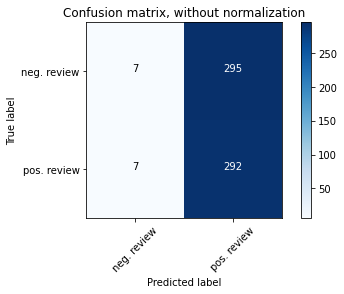

Normalized confusion matrix
[[0.02 0.98]
 [0.02 0.98]]


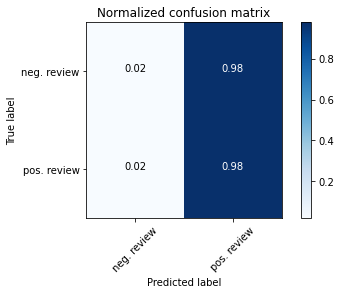

In [79]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix=confusion_matrix(y_test, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()